# Nova Futur Data Scientist Technical Task
The purpose of this notebook is to develop a solution for the task.

In [1]:
import numpy as np

from scipy.spatial import distance

import matplotlib.pyplot as plt
%matplotlib inline

## First step: read in the input information
I build the code to read in the input with the right structure and format.

In [2]:
print('Insert Z-city grid size (N) and number of pizzerias (M)')

# clause to take into account wrongly inserted input

correct_input = False

while not correct_input:
	try:
		N, M = list( map(int, input().split()) )

		if N < 0 or N > 1000 or M < 0 or M > 1000:
			print('both N and M must be in the range [0, 1000]! retry')
			continue
		else:
			print(f'you have chosen a grid size of {N} and {M} of pizzerias')
			correct_input = True

	except ValueError:
		print('input inserted erroneously! correct input example: 100 10')
		continue

Insert Z-city grid size (N) and number of pizzerias (M)


 5 2


you have chosen a grid size of 5 and 2 of pizzerias


below is the code to flexibly read in the coordinates and distance to the blocks served by each pizzeria

In [4]:
print("For each pizzeria, please insert its coordinates X,Y and the number K of blocks it serves")

pizzerias_data = []

for m in range(M):

	correct_pizzeria_input = False

	while not correct_pizzeria_input:

		try:
			X, Y, K = list( map(int, input().split()) )

			if X < 1 or X > N:
				print(f'pizzeria coordinate X={X} must be in the range [1, {N}]!')

			elif Y < 1 or Y > N:
				print(f'pizzeria coordinate Y={Y} must be in the range [1, {N}]!')

			elif K < 1 or K > 1000:
				print(f'maximum delivery distance K={K} must be in the range [1, 1000]!')

			else:
				correct_pizzeria_input = True

		except ValueError:
			print('input inserted erroneously! correct input example: 24 58 12')
			continue

		pizzerias_data.append( [X, Y, K] )

print(f"\n{'N. pizzeria':<20}{'X coordinate':<20}{'Y coordinate':<20}{'K distance':<20}")

for p, (x, y, k) in enumerate(pizzerias_data):
	print(f"{p+1:<20}{x:<20}{y:<20}{k:<20}")

For each pizzeria, please insert its coordinates X,Y and the number K of blocks it serves


 3 3 2
 1 1 2



N. pizzeria         X coordinate        Y coordinate        K distance          
1                   3                   3                   2                   
2                   1                   1                   2                   


## Second step: pizzerias serving maps

In [5]:
def get_pizza_delivery_map(N, pizzerias_data):

	# build grid of zeros to count pizzerias serving each city block
	city_blocks = np.zeros( (N, N), dtype=int )

	# create grid of 2D indices of blocks coordinates
	city_grid_indices = np.dstack( np.indices( (N, N) ) ).reshape(-1, 2)

	# consider pizzerias in turn
	for x, y, k in pizzerias_data:

		# reduce by one unit to convert coordinates into (Python) array indices
		x -= 1
		y -= 1

		# calculate distances of subgrid blocks to pizzeria's location
		pizzeria_distances = distance.cdist(
			city_grid_indices, 
			[[x, y]], 
			metric='cityblock'
		).reshape(N, N)

		# increase count to blocks reached by pizzeria's delivery
		city_blocks[pizzeria_distances<=k] += 1
	
	return city_blocks

In [6]:
delivery_map = get_pizza_delivery_map(N, pizzerias_data)

to visualise the counts per block in a human readable format, it's usefull to print the content of the array in reserved order

In [7]:
for row in delivery_map[::-1]:
	print(' '.join(str(r) for r in row))

0 0 0 1 1 1 1 1 0 0
0 0 1 1 2 1 1 1 1 0
0 1 1 2 2 2 1 1 1 1
1 1 2 2 2 2 2 1 1 1
1 2 3 2 2 2 2 2 1 1
2 3 3 3 2 2 2 2 2 1
3 3 3 3 3 2 2 2 2 2
3 3 3 3 3 3 2 2 2 2
2 3 3 3 3 3 3 2 2 2
2 2 3 3 3 3 2 2 2 1


Now a simple visualization of the blocks, coloured by the count of pizzerias serving them.

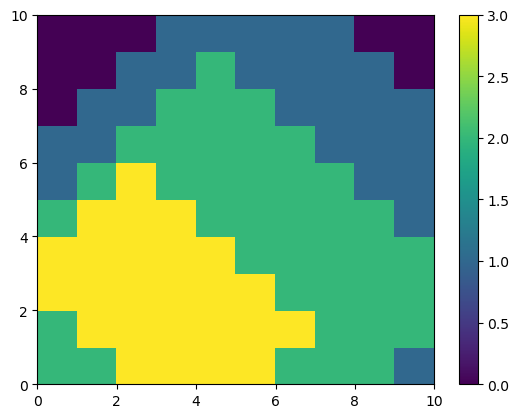

In [8]:
c = plt.pcolor(delivery_map);
plt.colorbar(c);

get the max value by simply calculating the max of the grid

In [9]:
delivery_map.max()

3

## Test
For large numbers of N and M, it's very inconvenient to type manually the coordinates and delivery distance of every pizzeria.  
To overcome this burden, we can simulate these all numbers.

In [10]:
# city size
N = np.random.randint(1, 1000)
# number of pizzerias
M = np.random.randint(1, 1000)

pizzerias_data = []

for _ in range(M):

	correct_pizzeria_input = False

	while not correct_pizzeria_input:

		X, Y, K = np.random.randint(1, high=1000, size=3)

		if X < 1 or X > N:
			continue

		elif Y < 1 or Y > N:
			continue

		elif K < 1 or K > 1000:
			continue

		else:
			pizzerias_data.append( [X, Y, K] )
			correct_pizzeria_input = True

Applying the function on these numbers, gives the result of the simulation

In [11]:
delivery_map = get_pizza_delivery_map(N, pizzerias_data)

N, M, delivery_map.max()

(90, 416, 398)

In [5]:
#def get_pizza_delivery_map(N, pizzerias_data):

# build grid of zeros to count pizzerias serving each city block
city_blocks = np.zeros( (N, N), dtype=int )


# consider pizzerias in turn
for x, y, k in pizzerias_data:

	# reduce by one unit to convert coordinates into (Python) array indices
	x -= 1
	y -= 1

	# calculate distances of subgrid blocks to pizzeria's location
	pizzeria_distances = distance.cdist(
		city_grid_indices, 
		[[x, y]], 
		metric='cityblock'
	).reshape(N, N)

	# increase count to blocks reached by pizzeria's delivery
	city_blocks[pizzeria_distances<=k] += 1

#	return city_blocks

In [ ]:
def num_covered_blocks(k):
	func = lambda 3*k
	return sum( )